In [140]:
# import python packages
import numpy as np
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt

In [141]:
directory = "."
list_of_dirs = [x[0] for x in os.walk(directory)] # get list of all folders in the directory

In [142]:
list_of_dirs

['.',
 './.ipynb_checkpoints',
 './.git',
 './.git/logs',
 './.git/logs/refs',
 './.git/logs/refs/remotes',
 './.git/logs/refs/remotes/origin',
 './.git/logs/refs/heads',
 './.git/branches',
 './.git/hooks',
 './.git/info',
 './.git/objects',
 './.git/objects/76',
 './.git/objects/e5',
 './.git/objects/83',
 './.git/objects/pack',
 './.git/objects/c7',
 './.git/objects/2f',
 './.git/objects/7a',
 './.git/objects/15',
 './.git/objects/1a',
 './.git/objects/b2',
 './.git/objects/91',
 './.git/objects/b4',
 './.git/objects/9c',
 './.git/objects/a6',
 './.git/objects/b0',
 './.git/objects/4d',
 './.git/objects/11',
 './.git/objects/f1',
 './.git/objects/30',
 './.git/objects/53',
 './.git/objects/7c',
 './.git/objects/a7',
 './.git/objects/28',
 './.git/objects/d5',
 './.git/objects/1c',
 './.git/objects/21',
 './.git/objects/c4',
 './.git/objects/f8',
 './.git/objects/14',
 './.git/objects/2d',
 './.git/objects/2a',
 './.git/objects/info',
 './.git/objects/e7',
 './.git/objects/b5',
 './.

## Single class to parse & plot

In [148]:
class CDC_Parser():
    def __init__(self, path):
        doa_raw = path + "Excess_Deaths_Associated_with_COVID-19.csv"
        print("Initializing CDC_Parser object, reading: %s"%doa_raw)
        self.doa_df = pd.read_csv(doa_raw)
        
    def statewise_parse(self,state,start_date=pd.Timestamp(2020,2,1),end_date=pd.Timestamp(2020,5,4),plot=False,verbose=0):
        if not isinstance(start_date, pd.Timestamp):
            print("start_date object of type %s, is not of type: 'Timestamp'"%type(start_date))
            return 0
        # Filter by state
        statewise_doa_data = self.doa_df.where(self.doa_df['State']==state).dropna(how='all')
        # Filter by causes
        statewise_doa_data = statewise_doa_data.where(statewise_doa_data['Outcome']=='All causes').dropna(how='all')
        # Filter out predictions, unweighted only
        statewise_doa_data = statewise_doa_data.where(statewise_doa_data['Type']=='Unweighted').dropna(how='all')
        if statewise_doa_data.empty:
            print("invalid state request to dataset: check your spelling")
        # time-ordered parsing by state
        statewise_doa_data["Week Ending Date"] = pd.to_datetime(statewise_doa_data["Week Ending Date"])
        statewise_doa_data = statewise_doa_data.sort_values(by=["Week Ending Date"]).reset_index(drop = True)
        statewise_doa_data = statewise_doa_data[statewise_doa_data["Week Ending Date"] > start_date]
        statewise_doa_data = statewise_doa_data[statewise_doa_data["Week Ending Date"] <= end_date]
        if verbose!=0:
            print(statewise_doa_data)
        if plot:
            self.plot(statewise_doa_data)
            
    def plot(self,data):
        plt.figure(figsize=(12,12))
        plt.figure(figsize=(12,12))
        plt.plot(data["Week Ending Date"], data["Observed Number"],'ok--')

## New York

Initializing CDC_Parser object, reading: ./data/Excess_Deaths_Associated_with_COVID-19.csv


<Figure size 864x864 with 0 Axes>

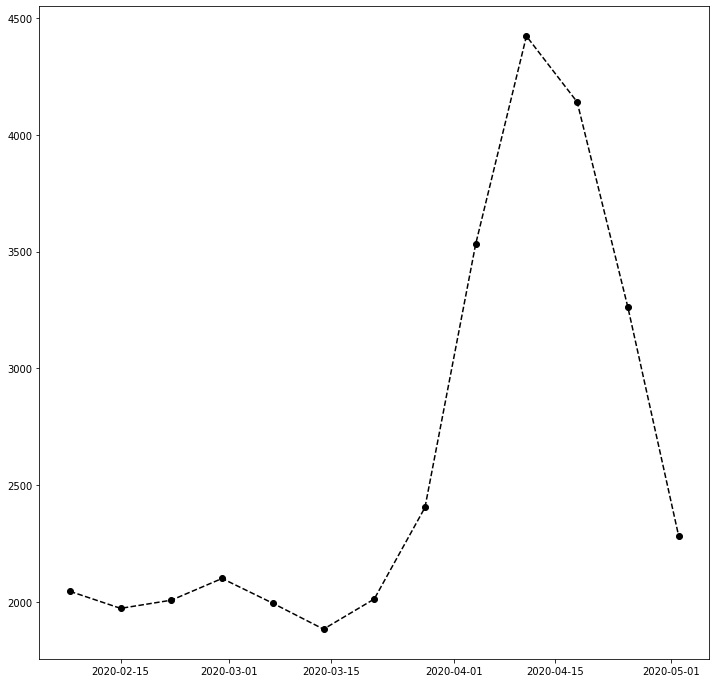

In [150]:
path = './data/'
state = 'New York'
start_date = pd.Timestamp(2020,2,1)
end_date = pd.Timestamp(2020,5,4)
cdc_parser = CDC_Parser(path)
cdc_parser.statewise_parse(state,start_date,end_date,True,0)

## California

Initializing CDC_Parser object, reading: ./data/Excess_Deaths_Associated_with_COVID-19.csv


<Figure size 864x864 with 0 Axes>

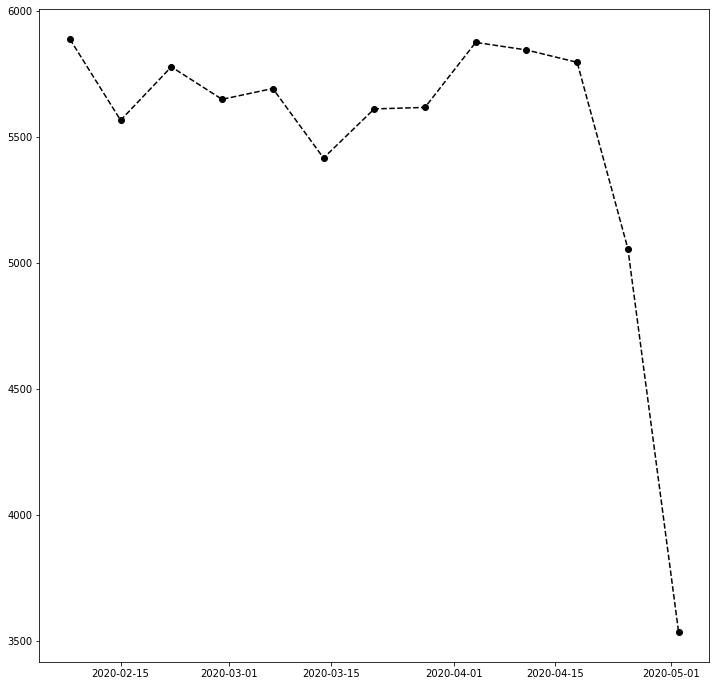

In [152]:
path = './data/'
state = 'California'
start_date = pd.Timestamp(2020,2,1)
end_date = pd.Timestamp(2020,5,4)
cdc_parser = CDC_Parser(path)
cdc_parser.statewise_parse(state,start_date,end_date,True,0)

## Illinois

Initializing CDC_Parser object, reading: ./data/Excess_Deaths_Associated_with_COVID-19.csv


<Figure size 864x864 with 0 Axes>

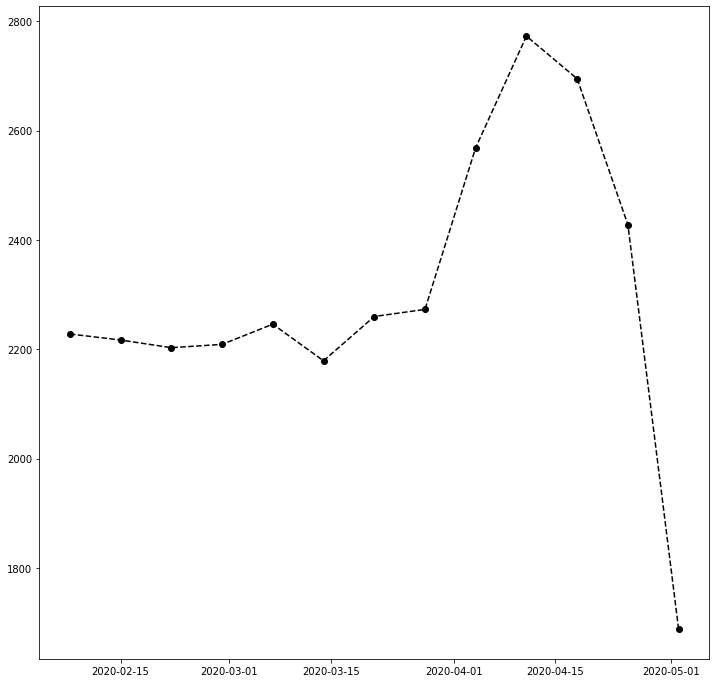

In [153]:
path = './data/'
state = 'Illinois'
start_date = pd.Timestamp(2020,2,1)
cdc_parser = CDC_Parser(path)
cdc_parser.statewise_parse(state,start_date,end_date,True,0)